In [41]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '95c866bc-2435-44c5-9868-400d25c28bad',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-14T16:47:55.269Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9922}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9620, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [42]:
type(data)

dict

In [43]:
import pandas as pd

#Show all the columns and rows, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
#Normalize the data into a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9620,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19093506.00000,19093506.00000,NaN,1,NaN,NaN,NaN,2022-07-14T16:45:00.000Z,20291.47711,28463876075.57835,-3.65490,0.08177,4.48514,-3.57972,-9.92349,-32.75737,-49.71500,387435440028.07819,42.71150,426121019397.35999,NaN,2022-07-14T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:03.348673
1,1027,Ethereum,ETH,ethereum,5823,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121545036.12400,121545036.12400,NaN,2,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,1139.51083,14787577425.78661,-15.44760,1.44016,7.21584,-7.11758,-7.38933,-45.07580,-62.30276,138501884758.85400,15.26870,138501884758.85001,NaN,2022-07-14T16:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:03.348673
2,825,Tether,USDT,tether,36122,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65930930060.39916,68156976394.56149,NaN,3,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.99943,46091079621.23484,-3.13210,-0.00203,0.01790,0.01911,0.04613,0.05786,-0.07563,65893027100.69781,7.26420,68117793705.54000,NaN,2022-07-14T16:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-14 16:48:03.348673
3,3408,USD Coin,USDC,usd-coin,4864,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55323400082.36042,55323400082.36042,NaN,4,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.99996,5114441810.29245,-2.25230,-0.01616,-0.02934,-0.02960,-0.02624,-0.02688,0.02178,55321099891.17171,6.09870,55321099891.17000,NaN,2022-07-14T16:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-14 16:48:03.348673
4,1839,BNB,BNB,bnb,1003,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,235.72552,1429323254.30531,0.04470,0.84449,5.94600,-2.64736,5.22422,-21.55004,-43.72310,38488549466.70226,4.24770,38922233826.56000,NaN,2022-07-14T16:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:03.348673
5,4687,Binance USD,BUSD,binance-usd,4051,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.99941,5757299286.54885,8.45600,0.02500,-0.26861,-0.23102,-0.12944,-0.26539,-0.14873,17536818208.75421,1.93540,17536818208.75000,NaN,2022-07-14T16:44:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-14 16:48:03.348673
6,52,XRP,XRP,xrp,765,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.32000,1082135160.39689,-7.59440,0.26074,2.29073,-5.15100,0.86702,-24.94743,-58.75840,15469884741.64532,1.70540,32000191048.16000,NaN,2022-07-14T16:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:03.348673
7,2010,Cardano,ADA,cardano,518,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,NaN,8,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.43064,831878802.71697,-11.10780,-0.27936,3.04426,-8.80211,-13.11596,-22.34447,-54.78872,14529448459.79353,1.60180,19378897658.11000,NaN,2022-07-14T16:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:0

In [45]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '95c866bc-2435-44c5-9868-400d25c28bad',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile('/Users/sawda/Projects/Portfolio project python/API.csv'):
        df.to_csv('/Users/sawda/Projects/Portfolio project python/API.csv', header = 'column_names')
    else:
        df.to_csv('/Users/sawda/Projects/Portfolio project python/API.csv', mode = 'a', header = False)

In [46]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed successfully


/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed successfully


/Users/sawda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed successfully


KeyboardInterrupt: 

In [48]:
df00 = pd.read_csv('/Users/sawda/Projects/Portfolio project python/API.csv')
df00

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9620,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19093506.00000,19093506.00000,NaN,1,NaN,NaN,NaN,2022-07-14T16:45:00.000Z,20291.47711,28463876075.57836,-3.65490,0.08177,4.48514,-3.57972,-9.92349,-32.75737,-49.71500,387435440028.07819,42.71150,426121019397.35999,NaN,2022-07-14T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:18.530698
1,1,1027,Ethereum,ETH,ethereum,5823,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121545036.12400,121545036.12400,NaN,2,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,1139.51083,14787577425.78661,-15.44760,1.44016,7.21584,-7.11758,-7.38933,-45.07580,-62.30276,138501884758.85400,15.26870,138501884758.85001,NaN,2022-07-14T16:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:18.530698
2,2,825,Tether,USDT,tether,36122,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,65930930060.39916,68156976394.56149,NaN,3,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.99943,46091079621.23484,-3.13210,-0.00203,0.01790,0.01911,0.04613,0.05786,-0.07563,65893027100.69781,7.26420,68117793705.54000,NaN,2022-07-14T16:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-14 16:48:18.530698
3,3,3408,USD Coin,USDC,usd-coin,4864,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,55323400082.36042,55323400082.36042,NaN,4,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.99996,5114441810.29245,-2.25230,-0.01616,-0.02934,-0.02960,-0.02624,-0.02688,0.02178,55321099891.17171,6.09870,55321099891.17000,NaN,2022-07-14T16:44:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-14 16:48:18.530698
4,4,1839,BNB,BNB,bnb,1003,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,235.72552,1429323254.30531,0.04470,0.84449,5.94600,-2.64736,5.22422,-21.55004,-43.72310,38488549466.70226,4.24770,38922233826.56000,NaN,2022-07-14T16:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:18.530698
5,5,4687,Binance USD,BUSD,binance-usd,4051,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.99941,5757299286.54885,8.45600,0.02500,-0.26861,-0.23102,-0.12944,-0.26539,-0.14873,17536818208.75421,1.93540,17536818208.75000,NaN,2022-07-14T16:44:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-14 16:48:18.530698
6,6,52,XRP,XRP,xrp,765,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.32000,1082135160.39689,-7.59440,0.26074,2.29073,-5.15100,0.86702,-24.94743,-58.75840,15469884741.64532,1.70540,32000191048.16000,NaN,2022-07-14T16:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:48:18.530698
7,7,2010,Cardano,ADA,cardano,518,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33739028515.75500,34512850428.99300,NaN,8,NaN,NaN,NaN,2022-07-14T16:44:00.000Z,0.43064,831878802.71697,-11.10780,-0.27936,3.04426,-8.80211,-13.11596,-22.34447,-54.78872,14529448459.79353,1.60180,19378897658.11000,NaN,2022-07-14T16:44:00.000Z,NaN,NaN,NaN

In [49]:
# Change the scientific notation, so we can see the numbers properly

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [50]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9620,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19093506.00000,19093506.00000,NaN,1,NaN,NaN,NaN,2022-07-14T16:47:00.000Z,20288.17351,28458877993.45208,-3.82620,-0.04487,4.31899,-3.89001,-9.84025,-32.82053,-49.71561,387372362563.26758,42.70460,426051643623.15997,NaN,2022-07-14T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:50:19.076179
1,1027,Ethereum,ETH,ethereum,5823,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121545036.12400,121545036.12400,NaN,2,NaN,NaN,NaN,2022-07-14T16:47:00.000Z,1140.00343,14796879292.61476,-15.46200,0.98038,7.12938,-7.35004,-7.08154,-45.18479,-62.27051,138561758687.94412,15.27530,138561758687.94000,NaN,2022-07-14T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:50:19.076179
2,825,Tether,USDT,tether,36122,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65930930060.39916,68156976394.56149,NaN,3,NaN,NaN,NaN,2022-07-14T16:47:00.000Z,0.99944,46099520128.30274,-3.24570,0.00435,0.01544,0.01778,0.06236,0.05061,-0.07324,65894103633.68321,7.26430,68118906585.84000,NaN,2022-07-14T16:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-14 16:50:19.076179
3,3408,USD Coin,USDC,usd-coin,4864,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55323400082.36042,55323400082.36042,NaN,4,NaN,NaN,NaN,2022-07-14T16:46:00.000Z,0.99993,5065635433.99034,-3.24840,-0.01115,-0.05376,-0.00938,-0.01007,-0.03195,0.03379,55319669539.93703,6.09850,55319669539.94000,NaN,2022-07-14T16:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-14 16:50:19.076179
4,1839,BNB,BNB,bnb,1004,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-07-14T16:46:00.000Z,235.75636,1434014685.91120,0.40420,0.51494,5.84622,-2.78456,5.49841,-21.83393,-43.67006,38493584801.03149,4.24350,38927325898.43000,NaN,2022-07-14T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:50:19.076179
5,4687,Binance USD,BUSD,binance-usd,4051,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,NaN,2022-07-14T16:47:00.000Z,1.00002,5758884368.85828,8.41840,0.02298,-0.20591,0.02171,0.03922,-0.20676,-0.08836,17547591493.18681,1.93440,17547591493.19000,NaN,2022-07-14T16:47:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-14 16:50:19.076179
6,52,XRP,XRP,xrp,765,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,NaN,2022-07-14T16:47:00.000Z,0.32007,1082080727.35491,-7.70060,0.15795,2.21025,-5.27923,1.18812,-25.08078,-58.73629,15473234184.07948,1.70580,32007119528.86000,NaN,2022-07-14T16:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:50:19.076179
7,2010,Cardano,ADA,cardano,518,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34512850428.99300,NaN,8,NaN,NaN,NaN,2022-07-14T16:46:00.000Z,0.43065,832475878.95960,-11.08500,-0.48769,2.88620,-8.99854,-12.84307,-22.70704,-54.76687,14529649856.26153,1.60180,19379166274.05000,NaN,2022-07-14T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-14 16:50:19.

In [51]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04487,4.31899,-3.89001,-9.84025,-32.82053,-49.71561
Ethereum,0.98038,7.12938,-7.35004,-7.08154,-45.18479,-62.27051
Tether,0.00435,0.01544,0.01778,0.06236,0.05061,-0.07324
USD Coin,-0.01115,-0.05376,-0.00938,-0.01007,-0.03195,0.03379
BNB,0.51494,5.84622,-2.78456,5.49841,-21.83393,-43.67006
Binance USD,0.02298,-0.20591,0.02171,0.03922,-0.20676,-0.08836
XRP,0.15795,2.21025,-5.27923,1.18812,-25.08078,-58.73629
Cardano,-0.48769,2.88620,-8.99854,-12.84307,-22.70704,-54.76687
Solana,0.42331,5.35199,-9.92172,17.25434,-35.27867,-65.71853


In [52]:
df4 = df3.stack()
df4

name                                               
Bitcoin                quote.USD.percent_change_1h     -0.04487
                       quote.USD.percent_change_24h     4.31899
                       quote.USD.percent_change_7d     -3.89001
                       quote.USD.percent_change_30d    -9.84025
                       quote.USD.percent_change_60d   -32.82053
                       quote.USD.percent_change_90d   -49.71561
Ethereum               quote.USD.percent_change_1h      0.98038
                       quote.USD.percent_change_24h     7.12938
                       quote.USD.percent_change_7d     -7.35004
                       quote.USD.percent_change_30d    -7.08154
                       quote.USD.percent_change_60d   -45.18479
                       quote.USD.percent_change_90d   -62.27051
Tether                 quote.USD.percent_change_1h      0.00435
                       quote.USD.percent_change_24h     0.01544
                       quote.USD.percent_change_7d  

In [53]:
type(df3)

pandas.core.frame.DataFrame

In [54]:
type(df4)

pandas.core.series.Series

In [55]:
# Change the series df4 to dataframe
df5 = df4.to_frame(name = 'values')
df5

values
name                                                        
Bitcoin               quote.USD.percent_change_1h   -0.04487
                      quote.USD.percent_change_24h   4.31899
                      quote.USD.percent_change_7d   -3.89001
                      quote.USD.percent_change_30d  -9.84025
                      quote.USD.percent_change_60d -32.82053
                      quote.USD.percent_change_90d -49.71561
Ethereum              quote.USD.percent_change_1h    0.98038
                      quote.USD.percent_change_24h   7.12938
                      quote.USD.percent_change_7d   -7.35004
                      quote.USD.percent_change_30d  -7.08154
                      quote.USD.percent_change_60d -45.18479
                      quote.USD.percent_change_90d -62.27051
Tether                quote.USD.percent_change_1h    0.00435
                      quote.USD.percent_change_24h   0.01544
                      quote.USD.percent_change_7d    0.01778
                      quote.USD.percent_change_30d   0.06236
                      quote.USD.percent_change_60d   0.05061
                      quote.USD.percent_change_90d  -0.07324
USD Coin              quote.USD.percent_change_1h   -0.01115
                      quote.USD.percent_change_24h  -0.05376
                      quote.USD.percent_change_7d   -0.00938
                      quote.USD.percent_change_30d  -0.01007
                      quote.USD.percent_change_60d  -0.03195
                      quote.USD.percent_change_90d   0.03379
BNB                   quote.USD.percent_change_1h    0.51494
                      quote.USD.percent_change_24h   5.84622
                      quote.USD.percent_change_7d   -2.78456
                      quote.USD.percent_change_30d   5.49841
                      quote.USD.percent_change_60d -21.83393
                      quote.USD.percent_change_90d -43.67006
Binance USD           quote.USD.percent_change_1h    0.02298
                      quote.USD.percent_change_24h  -0.20591
                      quote.USD.percent_change_7d    0.02171
                      quote.USD.percent_change_30d   0.03922
                      quote.USD.percent_change_60d  -0.20676
                      quote.USD.percent_change_90d  -0.08836
XRP                   quote.USD.percent_change_1h    0.15795
                      quote.USD.percent_change_24h   2.21025
                      quote.USD.percent_change_7d   -5.27923
                      quote.USD.percent_change_30d   1.18812
                      quote.USD.percent_change_60d -25.08078
                      quote.USD.percent_change_90d -58.73629
Cardano               quote.USD.percent_change_1h   -0.48769
                      quote.USD.percent_change_24h   2.88620
                      quote.USD.percent_change_7d   -8.99854
                      quote.USD.percent_change_30d -12.84307
                      quote.USD.percent_change_60d -22.70704
                      quote.USD.percent_change_90d -54.76687
Solana                quote.USD.percent_change_1h    0.42331
                      quote.USD.percent_change_24h   5.35199
                      quote.USD.percent_change_7d   -9.92172
                      quote.USD.percent_change_30d  17.25434
                      quote.USD.percent_change_60d -35.27867
                      quote.USD.percent_change_90d -65.71853
Dogecoin              quote.USD.percent_change_1h    0.05404
                      quote.USD.percent_change_24h   2.58780
                      quote.USD.percent_change_7d  -13.42973
                      quote.USD.percent_change_30d   8.51351
                      quote.USD.percent_change_60d -31.83624
                      quote.USD.percent_change_90d -58.06483
Dai                   quote.USD.percent_change_1h   -0.03687
                      quote.USD.percent_change_24h  -0.03311
                      quote.USD.percent_change_7d   -0.05222
                      quote.USD.percent_change_30d   0.00310
                      quote.

In [56]:
df5.count()

values    600
dtype: int64

In [57]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(600))

# Set the above DataFrame index object as the index
# using reset_index() function

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04487
1,Bitcoin,quote.USD.percent_change_24h,4.31899
2,Bitcoin,quote.USD.percent_change_7d,-3.89001
3,Bitcoin,quote.USD.percent_change_30d,-9.84025
4,Bitcoin,quote.USD.percent_change_60d,-32.82053
5,Bitcoin,quote.USD.percent_change_90d,-49.71561
6,Ethereum,quote.USD.percent_change_1h,0.98038
7,Ethereum,quote.USD.percent_change_24h,7.12938
8,Ethereum,quote.USD.percent_change_7d,-7.35004
9,Ethereum,quote.USD.percent_change_30d,-7.08154


In [58]:
# Change the column name

df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04487
1,Bitcoin,quote.USD.percent_change_24h,4.31899
2,Bitcoin,quote.USD.percent_change_7d,-3.89001
3,Bitcoin,quote.USD.percent_change_30d,-9.84025
4,Bitcoin,quote.USD.percent_change_60d,-32.82053
5,Bitcoin,quote.USD.percent_change_90d,-49.71561
6,Ethereum,quote.USD.percent_change_1h,0.98038
7,Ethereum,quote.USD.percent_change_24h,7.12938
8,Ethereum,quote.USD.percent_change_7d,-7.35004
9,Ethereum,quote.USD.percent_change_30d,-7.08154


In [59]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.04487
1,Bitcoin,24h,4.31899
2,Bitcoin,7d,-3.89001
3,Bitcoin,30d,-9.84025
4,Bitcoin,60d,-32.82053
5,Bitcoin,90d,-49.71561
6,Ethereum,1h,0.98038
7,Ethereum,24h,7.12938
8,Ethereum,7d,-7.35004
9,Ethereum,30d,-7.08154


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

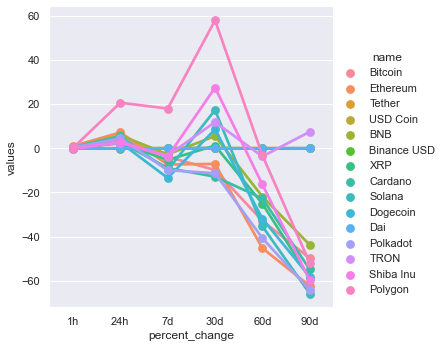

In [61]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7.head(90), kind = 'point')

In [63]:
df10 = df00[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,20291.47711,2022-07-14 16:48:18.530698
100,Bitcoin,20288.17351,2022-07-14 16:49:18.728029
200,Bitcoin,20288.17351,2022-07-14 16:50:19.076179


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

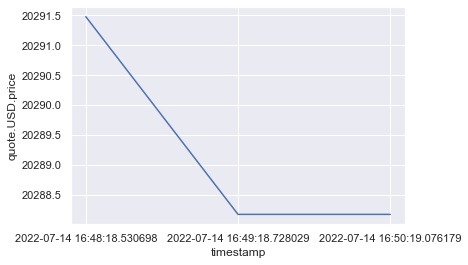

In [64]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)